In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In [3]:
df = pd.read_hdf('C:\\Users\\HP\\Desktop\\Bonn\\My Courses\\Advanced Lab Course\\E215 Belle II\\data-e215.h5', key = 'full')

# task 1 reconstruction of D0 decay

In [4]:
#kaon inavriant mass calculation
k_px=np.array(df['k_px'])
k_py=np.array(df['k_py'])
k_pz=np.array(df['k_pz'])
k_E=np.array(df['k_E'])
k_minv=np.sqrt(k_E**2-k_px**2-k_py**2-k_pz**2)
#pion invariant mass calculation
pi_px=np.array(df['pi_px'])
pi_py=np.array(df['pi_py'])
pi_pz=np.array(df['pi_pz'])
pi_E=np.array(df['pi_E'])
pi_minv=np.sqrt(pi_E**2-pi_px**2-pi_py**2-pi_pz**2)
#D_o invariant mass
D0_minv=np.sqrt((k_E+pi_E)**2-(k_px+pi_px)**2-(k_py+pi_py)**2-(k_pz+pi_pz)**2)
D0_p=np.array(np.sqrt((df['k_px']+df['pi_px'])**2+(df['k_py']+df['pi_py'])**2+(df['k_pz']+df['pi_pz'])**2))
#appending new rows
df['k_minv']=k_minv
df['pi_minv']=pi_minv
df['D0_minv']=D0_minv
df['D0_p']=D0_p

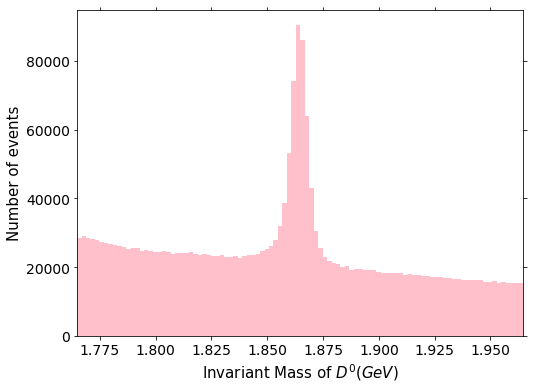

In [5]:
x=df['D0_minv']
plt.figure(figsize=(8,6))

plt.hist(x,bins=100,color='pink')
plt.xlim([min(x),max(x)])
plt.xlabel("Invariant Mass of $D^{0} (GeV)$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.savefig("inv_massD01.pdf",dpi='figure')
plt.show()

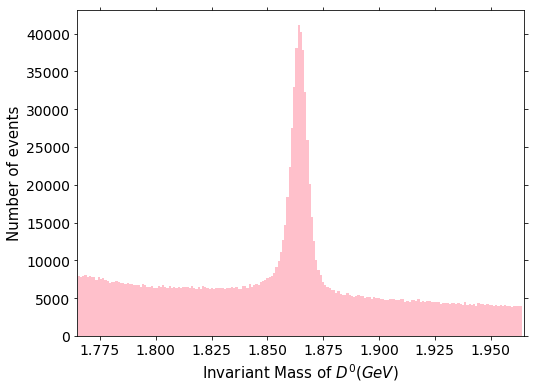

In [6]:
# creating charge cuts as we want to se only B0 and bar B0, and not B+. The charge cut is such qk+qpi=0
plt.figure(figsize=(8,6))
charge_df=df[df['k_q']+df['pi_q']==0]
df1=charge_df
hist, bin_edges = np.histogram(df1['D0_minv'],bins=200, range= (1.765,1.964))
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
plt.hist(df1['D0_minv'],bins=200, range= (1.765,1.964), color='pink')
plt.xlim([min(df1['D0_minv']),max(df1['D0_minv'])])
plt.xlabel("Invariant Mass of $D^{0} (GeV)$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.savefig("inv_massD0_charge1.pdf",dpi='figure')
plt.show()


[ 7906  7822  7954  8110  7878  7904  7866  7828  7456  7766  7568  7702
  7392  7320  7010  7176  7170  7296  7172  7066  7082  6852  7034  6848
  6834  6706  6768  6774  6446  6830  6708  6452  6466  6614  6400  6372
  6632  6520  6710  6464  6356  6568  6300  6486  6408  6438  6302  6492
  6498  6542  6372  6618  6334  6252  6444  6284  6638  6486  6372  6164
  6416  6188  6362  6316  6372  6394  6290  6390  6338  6438  6364  6434
  6236  6250  6572  6654  6386  6832  6514  6778  6852  6820  7108  7336
  7448  7632  7842  7950  8396  9126  9936 11186 12682 14702 18448 22416
 27478 32964 38158 41080 40164 37800 32268 25890 20094 15688 12550 10124
  8792  8020  7182  6792  6436  6366  6054  6032  5724  5960  5530  5432
  5402  5690  5472  5256  5198  5252  5436  5328  5254  5064  5202  5176
  4910  5132  5074  5036  4848  4926  4772  4734  4894  4872  4942  4828
  4754  4924  4916  4560  4604  4546  4726  4774  4638  4876  4502  4596
  4488  4576  4618  4522  4466  4548  4448  4274  4

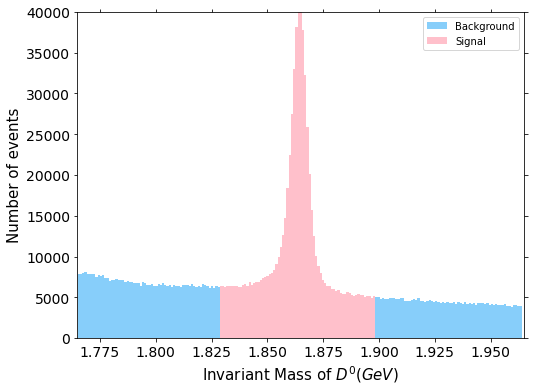

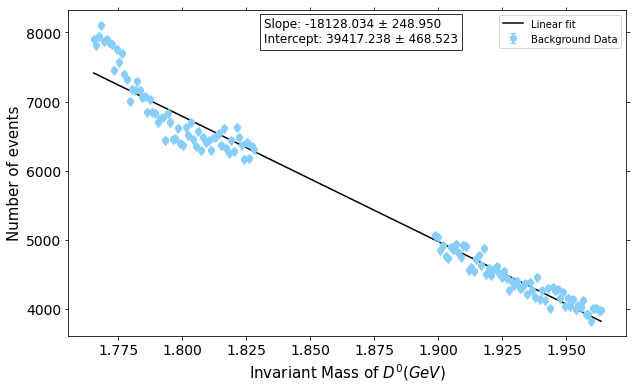

In [7]:
# # selecting signal and background cuts

k=list(hist)
max_index=k.index(max(hist))
print(hist)
print(max_index)
up_sig=max_index+35
low_sig=max_index-35

print(bin_edges[up_sig])
print(bin_edges[low_sig])

df2=df1[df1['D0_minv']<=bin_edges[up_sig]]
df3=df2[df2['D0_minv']>=bin_edges[low_sig]]#first signal cut




# bg_df=[]
plt.figure(figsize=(8,6))
bg_df=df1[(df1['D0_minv']>=bin_edges[up_sig]) | (df1['D0_minv']<=bin_edges[low_sig])]

plt.hist(bg_df['D0_minv'],bins = 200, range= (1.765,1.964),color='lightskyblue',label='Background')
plt.ylim(0,40000)
plt.hist(df3['D0_minv'],bins=200,range= (1.765,1.964),color='pink',label='Signal')

plt.xlim([min(bg_df['D0_minv']),max(bg_df['D0_minv'])])
plt.xlabel("Invariant Mass of $D^{0} (GeV)$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.legend()
plt.savefig("inv_massD0_masscut1.pdf",dpi='figure')

plt.show()




# # using a linear fit on the background

bg_hist,bg_edges=np.histogram(bg_df['D0_minv'],bins=200, range= (1.765,1.964))

bg_centres=(bg_edges[:-1]+bg_edges[1:])/2
bg_cen=[]
bg_his=[]
for i in range(len(bg_hist)):
    if bg_hist[i]!=0:
        bg_cen.append(bg_centres[i])
        bg_his.append(bg_hist[i])
        
#plt.scatter(bg_centres,bg_hist)
def linear(x,a,b):
    return a*x+b
popl,pcovl=curve_fit(linear,bg_cen,bg_his,sigma=np.sqrt(bg_his))
plt.figure(figsize=(10,6))
plt.plot(bg_cen,linear(np.array(bg_cen),*popl),color='k',label="Linear fit")

slope=popl[0]
intercept=popl[1]
slope_error = np.sqrt(pcovl[0, 0])
intercept_error = np.sqrt(pcovl[1, 1])
plt.errorbar(bg_cen,bg_his,np.sqrt(bg_his),fmt='o',color='lightskyblue',capthick=1.2,uplims=True,lolims=True,label='Background Data')
fit_text = f"Slope: {slope:.3f} ± {slope_error:.3f}\nIntercept: {intercept:.3f} ± {intercept_error:.3f}"
plt.text(0.35, 0.9, fit_text, transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel("Invariant Mass of $D^{0} (GeV)$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.legend()
plt.savefig("inv_massD0_bgfit1.pdf",dpi='figure')

plt.show()

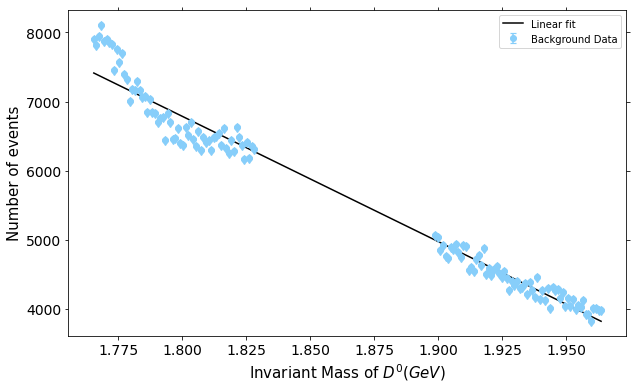

In [8]:


popl, pcovl = curve_fit(linear, bg_cen, bg_his, sigma=np.sqrt(bg_his))

# Plot the background fit with error bars
plt.figure(figsize=(10, 6))
plt.plot(bg_cen, linear(np.array(bg_cen), *popl), color='k', label="Linear fit")

slope = popl[0]
intercept = popl[1]

# Error bars for background data points
plt.errorbar(
    bg_cen,
    bg_his,
    yerr=np.sqrt(bg_his),  # Pass the uncertainties as yerr parameter
    fmt='o',
    color='lightskyblue',
    capthick=1.2,
    uplims=True,
    lolims=True,
    label='Background Data'
)

plt.xlabel("Invariant Mass of $D^{0} (GeV)$", size=15)
plt.ylabel("Number of events", size=15)
plt.tick_params(right=True, top=True, labelsize=14)
plt.legend()
plt.savefig("inv_massD0_bgfit1.pdf", dpi='figure')

plt.show()


signal purity is 0.6721035383713322
error on purity 0.0006537712076227444


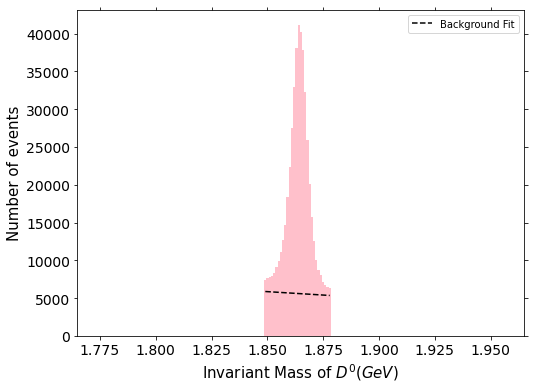

In [9]:
# second mass cut  for just signal
hist2,his_ed=np.histogram(df3['D0_minv'],bins=200, range= (1.765,1.964))
k=list(hist2)
max_index2=k.index(max(hist2))
# print(hist2)
# print(max_index2)
up_sig2=max_index2+15
low_sig2=max_index2-15
sig_df=df3[(df3['D0_minv']<=his_ed[up_sig2]) & (df3['D0_minv']>=his_ed[low_sig2])]
plt.figure(figsize=(8,6))

plt.hist(sig_df.D0_minv, bins=200,range= (1.765,1.964),color='pink')

hist2_sig,his2_ed=np.histogram(sig_df['D0_minv'],bins=200,range= (1.765,1.964))

mask = [hist2_sig > 0]
mask1=np.reshape(mask,np.shape(mask)[1])

sig_cen=(his2_ed[:-1]+his2_ed[1:])/2

sig_cen_wo_zero = sig_cen[mask1]


fit_bg = slope * np.array(sig_cen_wo_zero) + intercept



plt.plot(sig_cen_wo_zero,fit_bg,'k--',label='Background Fit')
print("signal purity is", 1-(np.sum(fit_bg)/np.sum(hist2_sig)))
purity=1-(np.sum(fit_bg)/np.sum(hist2_sig))
print("error on purity",np.sqrt(purity*(1-purity)/np.sum(hist2_sig)))
plt.xlim([min(df1['D0_minv']),max(df1['D0_minv'])])
plt.xlabel("Invariant Mass of $D^{0} (GeV)$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.legend()
plt.savefig("inv_massD0_mass2sig.pdf",dpi='figure')

plt.show()


In [10]:
#calculating momentum of the sidebands
D0_p_bg=np.array(np.sqrt((bg_df['k_px']+bg_df['pi_px'])**2+(bg_df['k_py']+bg_df['pi_py'])**2+(bg_df['k_pz']+bg_df['pi_pz'])**2))

In [11]:
D0_p_bg_avg=np.average(D0_p_bg)

In [12]:
print("Average momentum of D0 sidebands is:", D0_p_bg_avg, "GeV")

Average momentum of D0 sidebands is: 1.3902952475782455 GeV


In [13]:
D0_p_cand=np.array(np.sqrt((sig_df['k_px']+sig_df['pi_px'])**2+(sig_df['k_py']+sig_df['pi_py'])**2+(sig_df['k_pz']+sig_df['pi_pz'])**2))

In [14]:
print("Average momentum of D0 particles is:", np.average(D0_p_cand), "GeV")


Average momentum of D0 particles is: 1.6038072178460203 GeV


In [15]:
D0_p_sig = (np.average(D0_p_cand)-(1-purity)*D0_p_bg_avg)/purity

In [16]:
print(D0_p_sig)

1.7079724477089953


In [17]:
print(np.mean(D0_p_bg))
print(np.std(D0_p_bg)/np.sqrt(len(D0_p_bg)))

1.3902952475782455
0.0008338517811505429


In [18]:
print(np.mean(D0_p_cand))
print(np.std(D0_p_cand)/np.sqrt(len(D0_p_cand)))

1.6038072178460203
0.0011849722143694194


In [19]:
from uncertainties import ufloat

D0_cand = ufloat(1.6038072178460203,0.0011849722143694194)

D0_bg = ufloat(1.3902952475782455,0.0008338517811505429)

puri= ufloat(0.6716821565150752,0.0006539860476326045)

D0_p_sig_avg = ((D0_cand)-(1-puri)*D0_bg)/puri
print(D0_p_sig_avg)


1.7082+/-0.0018


# Task 2 Reconstruction of D*+ decay

In [20]:
# calculating pi momentum
pis_px=np.array(df['pis_px'])
pis_py=np.array(df['pis_py'])
pis_pz=np.array(df['pis_pz'])
pis_E=np.array(df['pis_E'])
pis_p_calc=np.array(np.sqrt(sig_df.pis_px**2+sig_df.pis_py**2+sig_df.pis_pz**2))
pis_p=np.array(df['pis_p'])

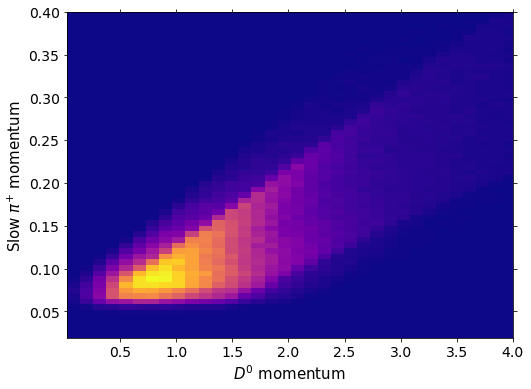

In [21]:
plt.figure(figsize=(8,6))
plt.hist2d(sig_df.D0_p,pis_p_calc, bins=(200, 200), cmap=plt.cm.plasma)
plt.xlim([min(sig_df.D0_p),4])
plt.ylim([min(pis_p_calc),0.4])
plt.xlabel("$D^{0}$ momentum",size=15)
plt.ylabel("Slow $\pi^{+}$ momentum",size=15)
plt.tick_params(right=True,top=True,labelsize=14)

plt.savefig("DvsPimom2dhist.pdf",dpi='figure')


C:\Users\HP\AppData\Local\Temp\ipykernel_14876\1413966319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_df['Dplus_minv']=Dplus_minv


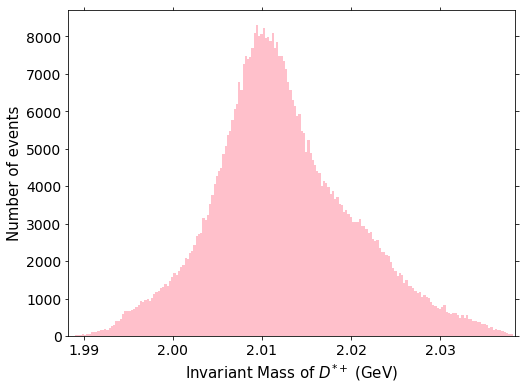

In [22]:
# invariant mass of three particles

Dplus_minv=np.sqrt((sig_df['k_E']+sig_df.pi_E+sig_df.pis_E)**2-(sig_df.k_px+sig_df.pi_px+sig_df.pis_px)**2-(sig_df.k_py+sig_df.pi_py+sig_df.pis_py)**2-(sig_df.k_pz+sig_df.pi_pz+sig_df.pis_pz)**2)
sig_df['Dplus_minv']=Dplus_minv
plt.figure(figsize=(8,6))
plt.hist(Dplus_minv,bins=200, color = 'pink')
plt.xlim([min(Dplus_minv),max(Dplus_minv)])
plt.xlabel("Invariant Mass of $D^{*+}$ (GeV)",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)

plt.savefig("InvariantDplus.pdf",dpi='figure')
# plt.ylim([0,45000])

C:\Users\HP\AppData\Local\Temp\ipykernel_14876\197505010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sig_df['m_diff']=m_diff


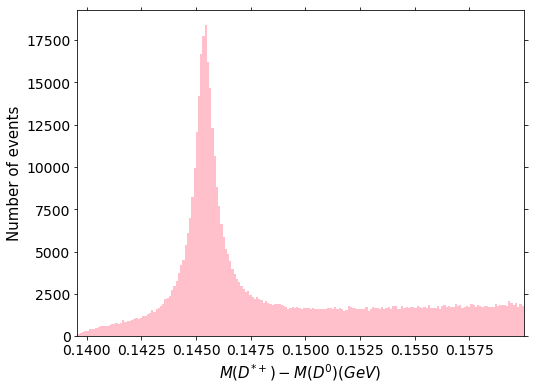

In [23]:
m_diff=Dplus_minv-sig_df.D0_minv
sig_df['m_diff']=m_diff
plt.figure(figsize=(8,6))
plt.hist(m_diff,bins=200, color = 'pink')
#plt.ylim([0,45000])

plt.xlim([min(m_diff),max(m_diff)])
plt.xlabel("$M(D^{*+})-M(D^{0})  (GeV)$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)

plt.savefig("Mdiffplot1.pdf",dpi='figure')

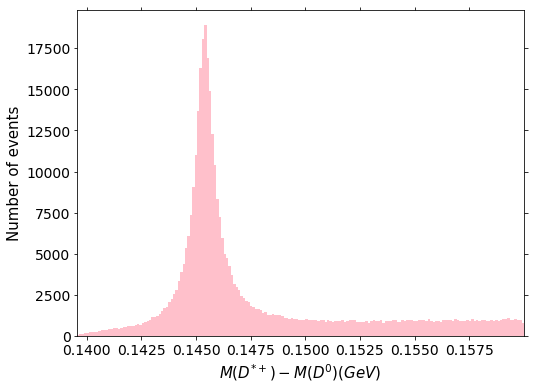

In [24]:
#charge cut
c=sig_df[sig_df['pi_q']==sig_df['pis_q']]
df_D1=c
plt.figure(figsize=(8,6))
plt.hist(df_D1['m_diff'],bins=200,range= (0.1390,0.1610), color='pink')


#plt.ylim([0,45000])
plt.xlim([min(m_diff),max(m_diff)])
#plt.xlim([min(df_D1['m_diff']),max(df_D1['m_diff'])])
plt.xlabel("$M(D^{*+})-M(D^{0}) (GeV)$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)

plt.savefig("Mdiffplotchargecut1.pdf",dpi='figure')

0.14978
0.14208


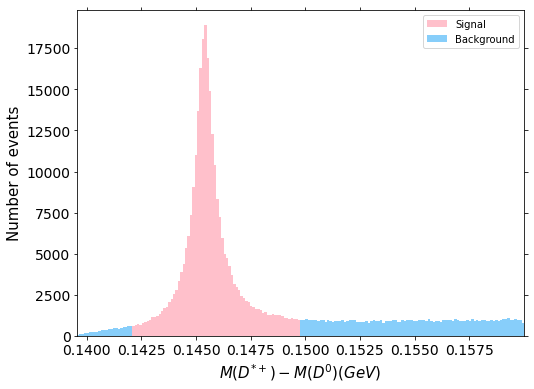

In [25]:
#fisrt mass cut for background window
histd1, bin_ed1 = np.histogram(df_D1['m_diff'],bins=200, range= (0.1390,0.1610))
bin_cend1 = (bin_ed1[:-1]+bin_ed1[1:])/2
#plt.hist(df_D1['m_diff'],bins=200, range= (0.1390,0.1610))
k=list(histd1)
max_index_d1=k.index(max(histd1))
plt.figure(figsize=(8,6))

up_sig_d1=max_index_d1+40
low_sig_d1=max_index_d1-30
df_D2=df_D1[(df_D1['m_diff']>=bin_ed1[low_sig_d1]) & (df_D1['m_diff']<=bin_ed1[up_sig_d1])]
plt.hist(df_D2['m_diff'],color="pink",bins=200, range= (0.1390,0.1610),label='Signal')

print(bin_ed1[up_sig_d1])
print(bin_ed1[low_sig_d1])
df_bg_d1=df_D1[(df_D1['m_diff']<=bin_ed1[low_sig_d1]) | (df_D1['m_diff']>bin_ed1[up_sig_d1])]
plt.hist(df_bg_d1['m_diff'],color="lightskyblue",bins=200, range= (0.1390,0.1610),label='Background')

plt.xlim([min(df_bg_d1['m_diff']),max(df_bg_d1['m_diff'])])
plt.xlabel("$M(D^{*+})-M(D^{0}) (GeV)$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.legend()
plt.savefig("Mdiffplotmasscut1.pdf",dpi='figure')
plt.show()

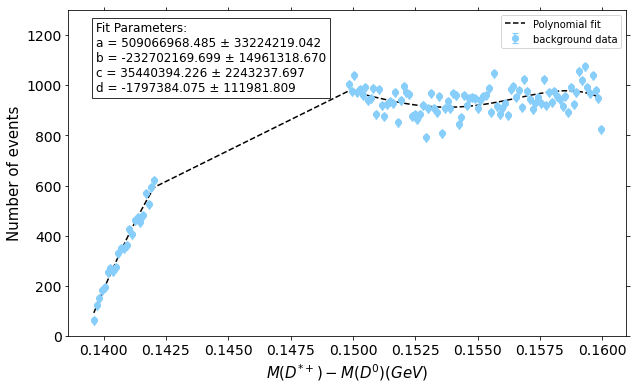

In [26]:
# fitting on the bg
hist_bg_d1, bin_ed_bg1 = np.histogram(df_bg_d1['m_diff'],bins=200, range= (0.1390,0.1610))
bin_cen_bgd1 = (bin_ed_bg1[:-1]+bin_ed_bg1[1:])/2

masks1 = [hist_bg_d1 > 0]
mask1=np.reshape(masks1,np.shape(masks1)[1])
bin_cen_bgd1=bin_cen_bgd1[mask1]
hist_bg_d1=hist_bg_d1[mask1]

#linear fit
slope, intercept, r, p, std_err = linregress(bin_cen_bgd1,hist_bg_d1)
fit_line = slope * np.array(bin_cen_bgd1) + intercept

#poly fit
p = np.poly1d(np.polyfit(bin_cen_bgd1, hist_bg_d1, 5))


plt.figure(figsize=(10,6))
plt.plot(bin_cen_bgd1, p(bin_cen_bgd1), 'k--',label='Polynomial fit')

# polyfit using our function
def poly_1(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d
popt1,pcov1=curve_fit(poly_1,bin_cen_bgd1,hist_bg_d1, sigma = np.sqrt(hist_bg_d1))

plt.errorbar(bin_cen_bgd1,hist_bg_d1,np.sqrt(hist_bg_d1),fmt='o',color='lightskyblue',capthick=1.2,uplims=True,lolims=True,label='background data')
#plt.plot(bin_cen_bgd1,fit_line,label='linear fit')
fit_params_text = (
    f'Fit Parameters:\n'
    f'a = {popt1[0]:.3f} ± {pcov1[0, 0]**0.5:.3f}\n'
    f'b = {popt1[1]:.3f} ± {pcov1[1, 1]**0.5:.3f}\n'
    f'c = {popt1[2]:.3f} ± {pcov1[2, 2]**0.5:.3f}\n'
    f'd = {popt1[3]:.3f} ± {pcov1[3, 3]**0.5:.3f}'
)
plt.text(0.05, 0.75, fit_params_text, transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))


plt.legend()
plt.ylim(0,1300)
plt.xlabel("$M(D^{*+})-M(D^{0}) (GeV)$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.savefig("Mdiffplotbgfitpoly.pdf",dpi='figure')
plt.show()

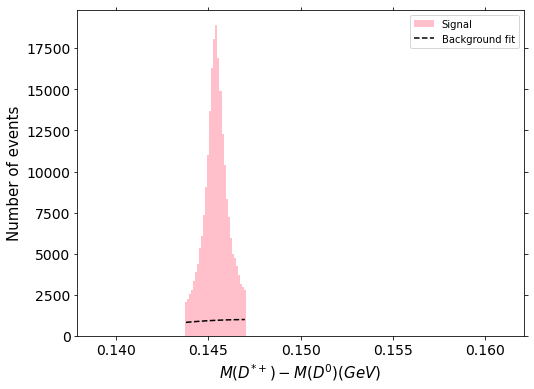

In [27]:
# second mass cut for finding the signal region

up_sig_d1=max_index_d1+15
low_sig_d1=max_index_d1-15
df_D3=df_D1[(df_D1['m_diff']>=bin_ed1[low_sig_d1]) & (df_D1['m_diff']<=bin_ed1[up_sig_d1])]
plt.figure(figsize=(8,6))
plt.hist(df_D3['m_diff'],color="pink",bins=200, range= (0.1390,0.1610), label='Signal')
hist_d3,bin_ed3=np.histogram(df_D3['m_diff'],bins=200, range= (0.1390,0.1610))
bin_cen_d3 = (bin_ed3[:-1]+bin_ed3[1:])/2


mask3 = [hist_d3>0]
masks3=np.reshape(mask3,np.shape(mask3)[1])
sig_cen_wo_zero = bin_cen_d3[masks3]


fit_bg_y=p(sig_cen_wo_zero)
plt.plot(sig_cen_wo_zero,fit_bg_y,'k--', label='Background fit')
plt.xlabel("$M(D^{*+})-M(D^{0}) (GeV)$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.legend()
plt.savefig("Mdiffplotmasscut2.pdf",dpi='figure')
plt.show()


In [28]:
print("signal purity is", 1-(np.sum(fit_bg_y)/np.sum(hist_d3)))
purity=1-(np.sum(fit_bg_y)/np.sum(hist_d3))
print("error on purity",np.sqrt(purity*(1-purity)/np.sum(hist_d3)))

signal purity is 0.8766690314168524
error on purity 0.0006861435822891908


# TASK 3 Reconstruction of a full B meson decay chain

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


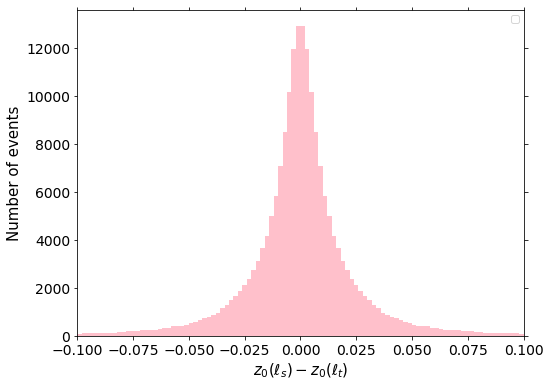

In [29]:
# here we have eliminated to get D+* and D0 correctly so the dataframe we use is df_D3
z0_diff=(df_D3.Ls_z0-df_D3.Lt_z0)
plt.figure(figsize=(8,6))
plt.hist(z0_diff,bins=100, range=(-0.1,0.1), color = 'pink')
plt.xlabel("$z_0(\ell_s)-z_0(\ell_t)$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.legend()

plt.xlim([-0.1,0.1])
plt.savefig("diffz0signaltag.pdf",dpi='figure')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_14876\54675311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_D3['D_z0']=z0_diff_D
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


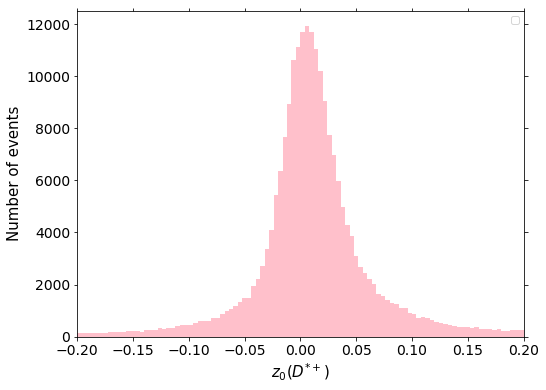

In [30]:
z0_diff_D=np.array((df_D3.k_z0+df_D3.pi_z0+df_D3.pis_z0)/3)
df_D3['D_z0']=z0_diff_D
plt.figure(figsize=(8,6))

plt.hist(z0_diff_D,bins=100,range=(-0.2,0.2), color='pink')
#plt.yscale('log')

plt.xlabel("$z_0(D^{*+})$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.legend()

plt.xlim([-0.2,0.2])
plt.savefig("z0Dstar.pdf",dpi='figure')
plt.show()


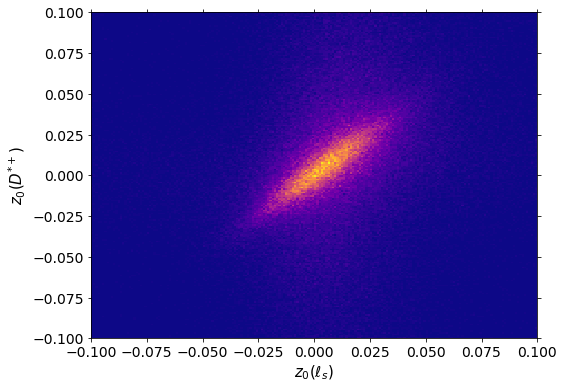

In [61]:
#plt.xlim([-0.04,0.04])
plt.figure(figsize=(8,6))
plt.hist2d(df_D3.Ls_z0,z0_diff_D, bins=(200, 200), cmap=plt.cm.plasma,range=[(-0.1,0.1),(-0.1,0.1)])
#plt.ylim([-0.04,0.04])



plt.ylabel("$z_0(D^{*+})$",size=15)
plt.xlabel("$z_0(\ell_s)$",size=15)
plt.tick_params(right=True,top=True,labelsize=14)


plt.xlim([-0.1,0.1])
plt.ylim([-0.1,0.1])
plt.savefig("z0lD2dhistbefore.pdf",dpi='figure', bbox_inches='tight')
plt.show()

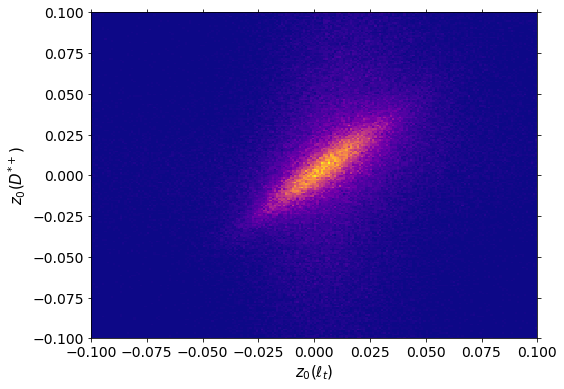

In [62]:

plt.figure(figsize=(8,6))
plt.hist2d(df_D3.Lt_z0,z0_diff_D, bins=(200, 200), cmap=plt.cm.plasma,range=[(-0.1,0.1),(-0.1,0.1)])
#plt.ylim([-0.04,0.04])



plt.ylabel("$z_0(D^{*+})$",size=15)
plt.xlabel("$z_0(\ell_t)$",size=15)
plt.tick_params(right=True,top=True,labelsize=14)


plt.xlim([-0.1,0.1])
plt.ylim([-0.1,0.1])
plt.savefig("z0ltagD2dhistbefore.pdf",dpi='figure', bbox_inches='tight')
plt.show()

In [33]:
#calculating the invariant mass of B0
B0_minv=np.sqrt((df_D3['k_E']+df_D3.pi_E+df_D3.pis_E+df_D3.Ls_E)**2-(df_D3.k_px+df_D3.pi_px+df_D3.pis_px+df_D3.Ls_px)**2-(df_D3.k_py+df_D3.pi_py+df_D3.pis_py+df_D3.Ls_py)**2-(df_D3.k_pz+df_D3.pi_pz+df_D3.pis_pz+df_D3.Ls_pz)**2)

In [34]:
df_D3['B0_minv']=B0_minv

C:\Users\HP\AppData\Local\Temp\ipykernel_14876\4066863617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_D3['B0_minv']=B0_minv


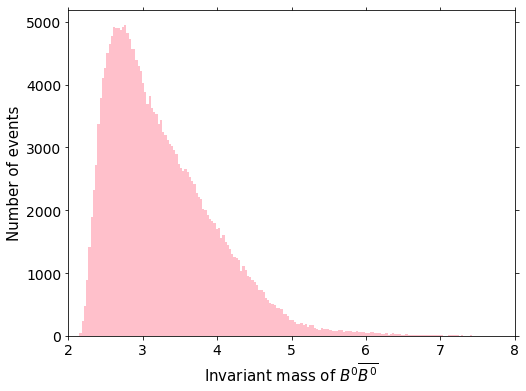

In [35]:
plt.figure(figsize=(8,6))
plt.hist(B0_minv, bins = 200,range=(2,8),color='pink')

plt.xlabel("Invariant mass of $B^0\overline{B^0}$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)


plt.xlim([2,8])
plt.savefig("invmassofB01.pdf",dpi='figure')
plt.show()

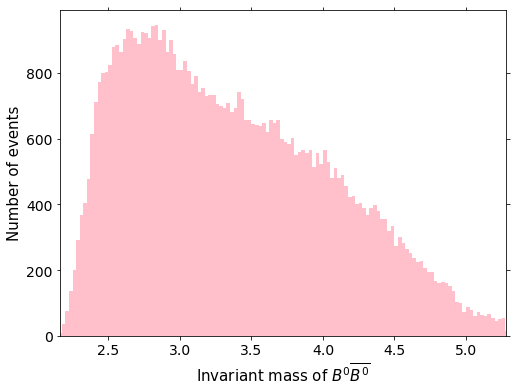

In [36]:
#applying various cuts
final_sig=df_D3[df_D3.nlep==2] 
final_sig=final_sig[final_sig.Ls_q==-1*(final_sig.pi_q+final_sig.pis_q+final_sig.k_q)]
final_sig=final_sig[final_sig.B0_minv<=5.27966]
final_sig=final_sig[np.abs(final_sig.Ls_z0-final_sig.D_z0)<np.abs(final_sig.Lt_z0-final_sig.D_z0)]




# plotting the other plots
plt.figure(figsize=(8,6))
plt.hist(final_sig.B0_minv,bins=200,range=(2,7), color='pink')

plt.xlabel("Invariant mass of $B^0\overline{B^0}$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)


plt.xlim([min(final_sig.B0_minv),max(final_sig.B0_minv)])
plt.savefig("invmassofB02allcut.pdf",dpi='figure')
plt.show()



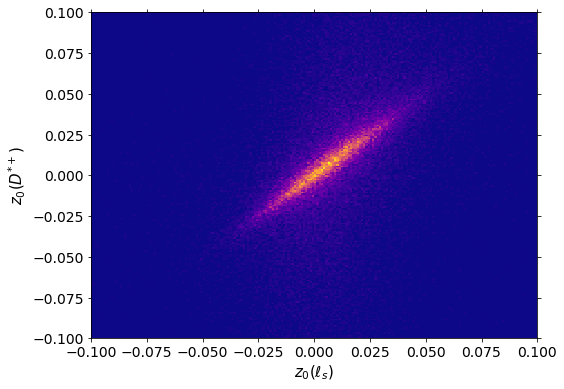

In [63]:

plt.figure(figsize=(8,6))
plt.hist2d(final_sig.Ls_z0,final_sig.D_z0, bins=(200, 200), cmap=plt.cm.plasma,range=[(-0.1,0.1),(-0.1,0.1)])



plt.ylabel("$z_0(D^{*+})$",size=15)
plt.xlabel("$z_0(\ell_s)$",size=15)
plt.tick_params(right=True,top=True,labelsize=14)


plt.xlim([-0.1,0.1])
plt.ylim([-0.1,0.1])
plt.savefig("z0lsigD2dhistafter.pdf",dpi='figure', bbox_inches='tight')
plt.show()

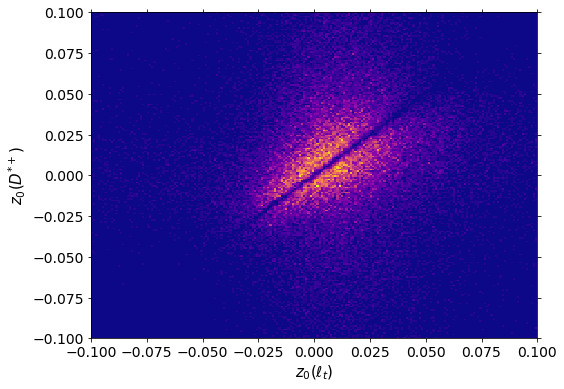

In [64]:

plt.figure(figsize=(8,6))
plt.hist2d(final_sig.Lt_z0,final_sig.D_z0, bins=(200, 200), cmap=plt.cm.plasma,range=[(-0.1,0.1),(-0.1,0.1)])


plt.ylabel("$z_0(D^{*+})$",size=15)
plt.xlabel("$z_0(\ell_t)$",size=15)
plt.tick_params(right=True,top=True,labelsize=14)


plt.xlim([-0.1,0.1])
plt.ylim([-0.1,0.1])
plt.savefig("z0ltagD2dhistafter.pdf",dpi='figure', bbox_inches='tight')
plt.show()


# Task 4 Measurement of oscillation frequency

In [39]:
from uncertainties import unumpy

In [40]:
osci_df=final_sig[final_sig.Ls_q==final_sig.Lt_q]
nosci_df=final_sig[final_sig.Ls_q==-1*final_sig.Lt_q]


osci_hist,osci_edg=np.histogram(osci_df.deltat,bins=75,range=(0,12))
osci_cen=(osci_edg[:-1]+osci_edg[1:])/2
osci_hist=np.array(osci_hist)
osci_cen=np.array(osci_cen)

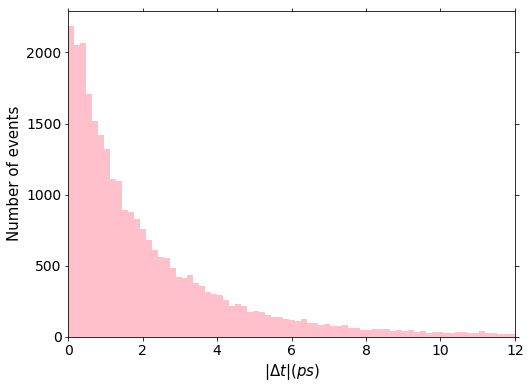

In [41]:
plt.figure(figsize=(8,6))

plt.hist(osci_df.deltat,bins=75,range=(0,12),color='pink')

plt.xlabel("$|\Delta t|  (ps)$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)


plt.xlim([0,12])

plt.savefig("oscihist.pdf",dpi='figure')
plt.show()

In [42]:

nosci_hist,nosci_edg=np.histogram(nosci_df.deltat,bins=75,range=(0,12))
nosci_cen=(nosci_edg[:-1]+nosci_edg[1:])/2
nosci_hist=np.array(nosci_hist)
nosci_cen=np.array(nosci_cen)

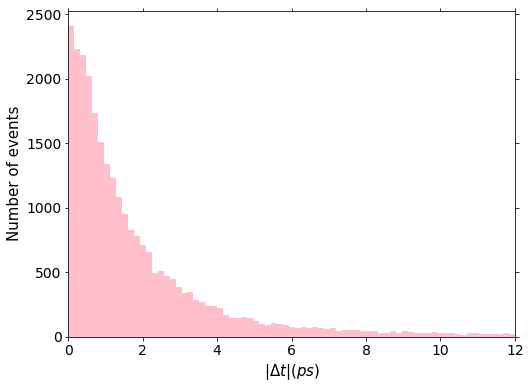

In [43]:
plt.figure(figsize=(8,6))



plt.hist(nosci_df.deltat,bins=75,range=(0,12),color='pink')

plt.xlabel("$|\Delta t|  (ps)$",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)


plt.xlim([0,12])
plt.savefig("noscihist.pdf",dpi='figure')
plt.show()

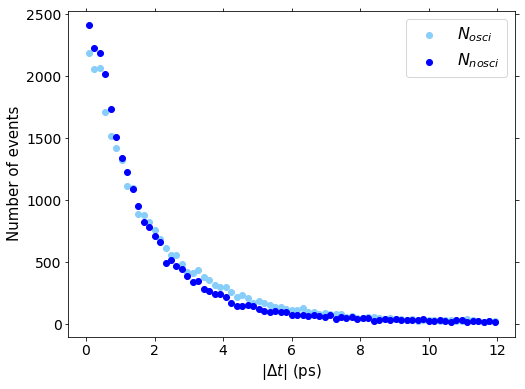

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(osci_cen,osci_hist,color='lightskyblue', label='$N_{osci}$')
plt.scatter(nosci_cen,nosci_hist,color='blue',label='$N_{nosci}$')
plt.xlabel("$|\Delta t|$ (ps)",size=15)
plt.ylabel("Number of events",size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.legend(fontsize=16)
plt.savefig("nosciosciscatterdeltat.pdf",dpi='figure')
plt.show()

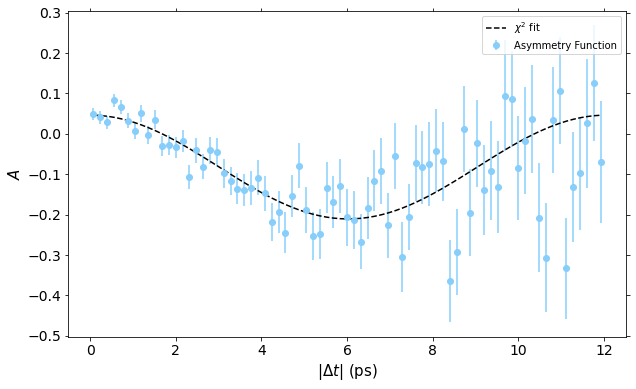

In [45]:
assym1=(nosci_hist-osci_hist)/(nosci_hist+osci_hist)

nosci=unumpy.uarray(nosci_hist, np.sqrt(nosci_hist))
osci=unumpy.uarray(osci_hist, np.sqrt(osci_hist))
assym=(nosci-osci)/(nosci+osci)

plt.figure(figsize=(10,6))
plt.errorbar(osci_cen,unumpy.nominal_values(assym),yerr=unumpy.std_devs(assym),fmt='o',color='lightskyblue',label='Asymmetry Function')
def assym_func(t,freq,A,offset):
    return ((1-2*A)*np.cos(freq*t)+offset)
y=unumpy.nominal_values(assym)
popt2,pcov2=curve_fit(assym_func,osci_cen,y,sigma=unumpy.std_devs(assym))
plt.plot(osci_cen,assym_func(osci_cen,*popt2), 'k--', label='$\chi^2$ fit')
plt.legend()
plt.xlabel('$|\Delta t|$ (ps)',size=15)
plt.ylabel('$A$',size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.savefig("asymmetryfitorig.pdf",dpi='figure')
plt.show()
#plt.plot(nosci_cen,assym,'ko--')

In [46]:
oscillation_frequency = popt2[0]
print(oscillation_frequency)

0.5212071028573779


In [47]:
A = popt2[1]  # Get the value of 'A' from the fit

# Calculate dilution 'D' based on 'A'
dilution = 1 - 2 * A
print(dilution)


0.12847731205048696


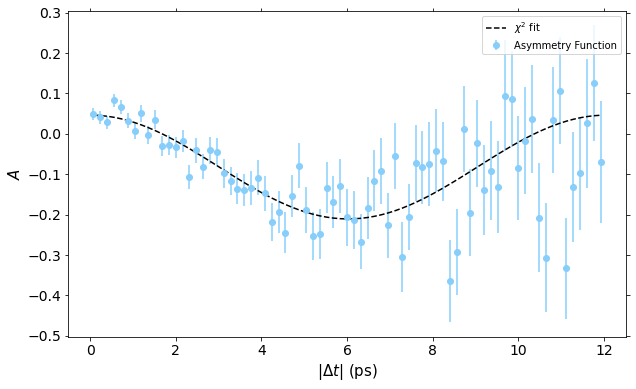

In [48]:
assym1=(nosci_hist-osci_hist)/(nosci_hist+osci_hist)

nosci=unumpy.uarray(nosci_hist, np.sqrt(nosci_hist))
osci=unumpy.uarray(osci_hist, np.sqrt(osci_hist))
assym=(nosci-osci)/(nosci+osci)

plt.figure(figsize=(10,6))
plt.errorbar(osci_cen,unumpy.nominal_values(assym),yerr=unumpy.std_devs(assym),fmt='o',color='lightskyblue',label='Asymmetry Function')
def assym_func(t,freq,P_wrong,offset):
    return ((1-2*P_wrong)*np.cos(freq*t)+offset)
y=unumpy.nominal_values(assym)
popt2,pcov2=curve_fit(assym_func,osci_cen,y,sigma=unumpy.std_devs(assym))
plt.plot(osci_cen,assym_func(osci_cen,*popt2), 'k--', label='$\chi^2$ fit')
plt.legend()
plt.xlabel('$|\Delta t|$ (ps)',size=15)
plt.ylabel('$A$',size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.savefig("asymmetryfitorigfinal.pdf",dpi='figure')
plt.show()
#plt.plot(nosci_cen,assym,'ko--')

In [49]:
# After the fit, retrieve the values of freq, P_wrong, and their errors
freq_fit = popt2[0]           # Fitted oscillation frequency
P_wrong_fit = popt2[1]        # Fitted mistagging parameter

# Extract the errors from the covariance matrix
freq_error = np.sqrt(pcov2[0, 0])    # Error for the oscillation frequency
P_wrong_error = np.sqrt(pcov2[1, 1]) # Error for the mistagging parameter

# Print the results
print(f"Fitted Oscillation Frequency: {freq_fit} ± {freq_error}")
print(f"Fitted P_wrong (Mistagging Parameter): {P_wrong_fit} ± {P_wrong_error}")


Fitted Oscillation Frequency: 0.5212071028573779 ± 0.01829859841472972
Fitted P_wrong (Mistagging Parameter): 0.4357613439747565 ± 0.004004404015532136


In [55]:
dilution = 1 -( 2 * P_wrong_fit)
print(dilution)
dilution_error = abs(dilution) * (P_wrong_error / P_wrong_fit)

print(f"dilution: {dilution} ± {dilution_error}")

0.12847731205048696
dilution: 0.12847731205048696 ± 0.0011806349310083564


In [72]:
import numpy as np
import scipy.stats as stats

# Calculate the chi-squared value using nominal values and standard deviations
chi_squared = np.sum(((unumpy.nominal_values(assym) - assym_func(osci_cen, *popt2)) / unumpy.std_devs(assym))**2)

# Convert degrees of freedom to a regular Python integer
df = int(len(osci_cen) - len(popt2))

# Calculate the chi-squared probability (p-value)
chi_squared_prob = 1 - stats.chi2.sf(chi_squared, df)

# Print the results
print(f"Chi-Squared (χ²): {chi_squared:.2f}")
print(f"Degrees of Freedom (df): {df}")
print(f"Chi-Squared Probability (p-value): {chi_squared_prob:.4f}")


Chi-Squared (χ²): 87.34
Degrees of Freedom (df): 72
Chi-Squared Probability (p-value): 0.8947


In [67]:
# Calculate the residuals
residuals = assym - assym_func(osci_cen, *popt2)

# Convert unumpy arrays to standard NumPy arrays
residuals_numpy = unumpy.nominal_values(residuals)
std_devs_numpy = unumpy.std_devs(assym)

# Calculate the reduced chi-squared
chi_squared_red = np.sum((residuals_numpy / std_devs_numpy)**2) / (len(osci_cen) - len(popt2))

# Calculate the p-value
p_value = 1 - stats.chi2.cdf(chi_squared_red, df=len(osci_cen) - len(popt2))

# Print the results
print(f"Reduced Chi-Squared (χ²_red): {chi_squared_red:.2f}")
print(f"P-Value: {p_value:.4f}")


Reduced Chi-Squared (χ²_red): 1.21
P-Value: 1.0000


In [66]:
residuals = assym - assym_func(osci_cen, *popt2)
chi_squared_red = np.sum((residuals / unumpy.std_devs(assym))**2) / (len(osci_cen) - len(popt2))
import scipy.stats as stats

p_value = 1 - stats.chi2.cdf(chi_squared_red, df=len(osci_cen) - len(popt2))


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
print(f"Reduced Chi-Squared (χ²_red): {chi_squared_red:.2f}")
print(f"P-Value: {p_value:.4f}")


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


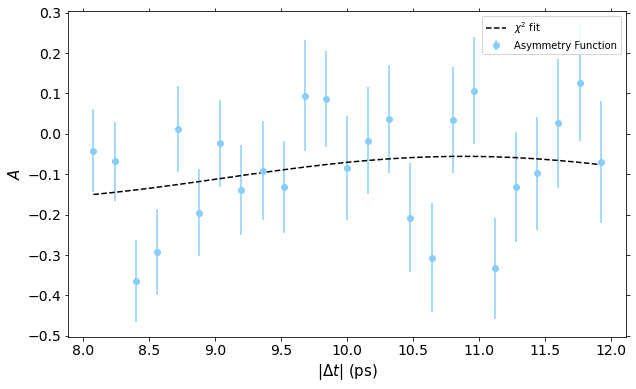

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import uncertainties.unumpy as unumpy


# Define the asymmetry function with the mistagging parameter
def assym_funcn(t, freq, A, offset, P_wrong):
    return (1 - 2 * P_wrong) * np.cos(freq * t) + offset

sigma = unumpy.std_devs(assym)

# Define the delta t range you want to fit (8-12)
delta_t_min = 8.0
delta_t_max = 12.0

# Find the indices within the specified range
indices_within_range = np.where((osci_cen >= delta_t_min) & (osci_cen <= delta_t_max))[0]

# Slice the data and uncertainties
osci_cen_slice = osci_cen[indices_within_range]
y_slice = y[indices_within_range]
sigma_slice = sigma[indices_within_range]

# Perform the fit on the sliced data
popt2, pcov2 = curve_fit(assym_funcn, osci_cen_slice, y_slice, sigma=sigma_slice)

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(osci_cen_slice, y_slice, yerr=sigma_slice, fmt='o', color='lightskyblue', label='Asymmetry Function')
plt.plot(osci_cen_slice, assym_funcn(osci_cen_slice, *popt2), 'k--', label='$\chi^2$ fit')
plt.legend()
plt.xlabel('$|\Delta t|$ (ps)', size=15)
plt.ylabel('$A$', size=15)
plt.tick_params(right=True, top=True, labelsize=14)
plt.savefig("asymmetryfit.pdf", dpi='figure')
plt.show()


In [184]:
oscillation_frequency = popt2[0]
print(oscillation_frequency)

0.8663926809337337


In [185]:
A = popt2[1]  # Get the value of 'A' from the fit

dilution = 1 - 2 * A
print(dilution)


-1.0


In [186]:
P_wrong = popt2[3]
P_wrong

0.5269167284149683

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


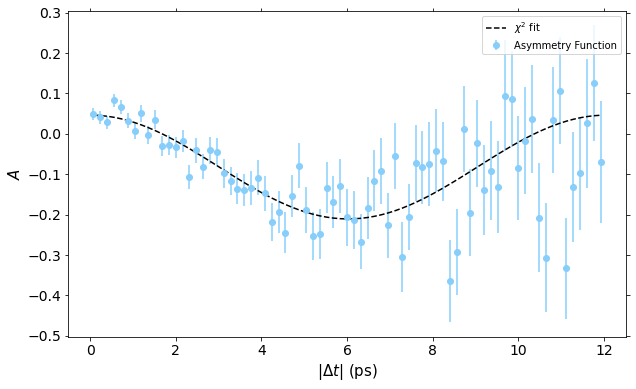

In [209]:
def assym_funcn(t, freq, A, offset, P_wrong):
    return (1 - 2 * P_wrong) * np.cos(freq * t) + offset
plt.figure(figsize=(10,6))
plt.errorbar(osci_cen,unumpy.nominal_values(assym),yerr=unumpy.std_devs(assym),fmt='o',color='lightskyblue',label='Asymmetry Function')

y=unumpy.nominal_values(assym)
popt2,pcov2=curve_fit(assym_funcn,osci_cen,y,sigma=unumpy.std_devs(assym))
plt.plot(osci_cen,assym_funcn(osci_cen,*popt2), 'k--', label='$\chi^2$ fit')
plt.legend()
plt.xlabel('$|\Delta t|$ (ps)',size=15)
plt.ylabel('$A$',size=15)
plt.tick_params(right=True,top=True,labelsize=14)
plt.savefig("asymmetryfit.pdf",dpi='figure')
plt.show()

In [210]:
oscillation_frequency = popt2[0]
print(oscillation_frequency)

0.5212071028573779


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


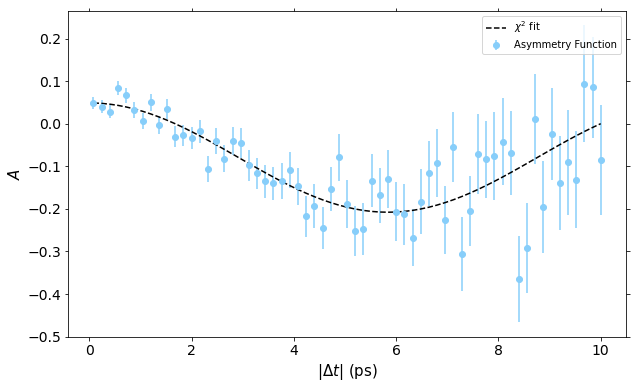

In [212]:
delta_t_upper_limit = 10.0

# Filter the data based on the upper limit
indices_within_limit = np.where(osci_cen <= delta_t_upper_limit)[0]
osci_cen_filtered = osci_cen[indices_within_limit]
y_filtered = y[indices_within_limit]
sigma_filtered = sigma[indices_within_limit]

# Perform the fit on the filtered data
popt2, pcov2 = curve_fit(assym_funcn, osci_cen_filtered, y_filtered, sigma=sigma_filtered)

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(osci_cen_filtered, y_filtered, yerr=sigma_filtered, fmt='o', color='lightskyblue', label='Asymmetry Function')
plt.plot(osci_cen_filtered, assym_funcn(osci_cen_filtered, *popt2), 'k--', label='$\chi^2$ fit')
plt.legend()
plt.xlabel('$|\Delta t|$ (ps)', size=15)
plt.ylabel('$A$', size=15)
plt.tick_params(right=True, top=True, labelsize=14)
plt.savefig("asymmetryfit.pdf", dpi='figure')
plt.show()


In [213]:
popt2

array([ 0.5381106 ,  1.        , -0.0793617 ,  0.43578626])

In [214]:
pcov2

array([[inf, inf, inf, inf],
       [inf, inf, inf, inf],
       [inf, inf, inf, inf],
       [inf, inf, inf, inf]])

In [215]:
oscillation_frequency = popt2[0]
print(oscillation_frequency)

0.5381106024388805


In [216]:
P_wrong = popt2[3]
P_wrong

0.43578626115562985

In [217]:

# Calculate dilution 'D' based on 'A'
dilution = 1 - (2 * P_wrong )
print(dilution)


0.1284274776887403


Minimal chi-square: 87.33862030987449
Degrees of freedom: 72
Chi-square probability (p-value): 0.10529258118774129
Parameter_0 = 0.521+/-0.018
Parameter_1 = 0.436+/-0.004
Parameter_2 = -0.082+/-0.007


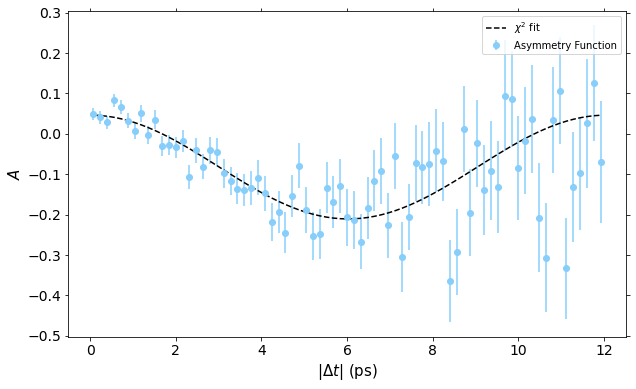

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
import uncertainties.unumpy as unumpy
from uncertainties import ufloat


sigma = unumpy.std_devs(assym)

# Perform the fit
popt2, pcov2 = curve_fit(assym_func, osci_cen, y, sigma=sigma)

# Calculate the fitted values
fitted_values = assym_func(osci_cen, *popt2)

# Calculate the minimal chi-square value
minimal_chi2 = np.sum(((y - fitted_values) / sigma) ** 2)

# Calculate the degrees of freedom
n_dof = len(osci_cen) - len(popt2)

# Calculate the p-value
chi2prob = chi2.sf(minimal_chi2, n_dof)

# Print the chi-square value, p-value, and fitted parameters with uncertainties
print("Minimal chi-square:", minimal_chi2)
print("Degrees of freedom:", n_dof)
print("Chi-square probability (p-value):", chi2prob)
for i, param in enumerate(popt2):
    uncertainty = np.sqrt(pcov2[i, i])
    print(f"Parameter_{i} = {ufloat(param, uncertainty)}")

# Plot the data and fit
plt.figure(figsize=(10, 6))
plt.errorbar(osci_cen, y, yerr=sigma, fmt='o', color='lightskyblue', label='Asymmetry Function')
plt.plot(osci_cen, fitted_values, 'k--', label='$\chi^2$ fit')
plt.legend()
plt.xlabel('$|\Delta t|$ (ps)', size=15)
plt.ylabel('$A$', size=15)
plt.tick_params(right=True, top=True, labelsize=14)
plt.savefig("asymmetryfit.pdf", dpi='figure')
plt.show()


In [141]:
def chi_square(observed, expected, uncertainty):
    residuals = observed - expected
    chi_sq = np.sum((residuals / uncertainty)**2)
    return chi_sq

# Perform the fit and calculate chi-square
y = unumpy.nominal_values(assym)
popt2, pcov2 = curve_fit(assym_func, osci_cen, y, sigma=unumpy.std_devs(assym))
expected = assym_func(osci_cen, *popt2)
observed = y
uncertainty = unumpy.std_devs(assym)

chi_sq = chi_square(observed, expected, uncertainty)
print(f"Chi-square value: {chi_sq}")

Chi-square value: 87.33862030987449


In [143]:
# Number of data points (N) in your dataset
N = len(osci_cen)  # Assuming osci_cen is the array of data points you used

# Number of parameters estimated (k)
k = len(popt2)  # popt2 contains the estimated parameters from the fit


In [146]:
import scipy.stats

In [147]:
chi_squared = 87.33862030987449

# Degrees of freedom
dof = N - k  # Replace N and k with your values

# Calculate the p-value
p_value = 1 - scipy.stats.chi2.cdf(chi_squared, df=dof)

print(f"P-value: {p_value}")

P-value: 0.10529258118774132


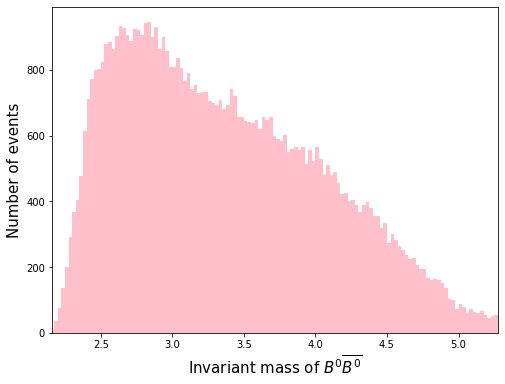

In [79]:
plt.figure(figsize=(8,6))
plt.hist(final_sig.B0_minv,bins=200,range=(2,7), color='pink')

plt.xlabel("Invariant mass of $B^0\overline{B^0}$",size=15)
plt.ylabel("Number of events",size=15)


plt.xlim([min(final_sig.B0_minv),max(final_sig.B0_minv)])
plt.savefig("invmassofB02allcut.pdf",dpi='figure')
plt.show()

In [102]:
len(unumpy.nominal_values(assym))

200

In [103]:
len(osci_cen)

200

In [104]:
len(unumpy.std_devs(assym))

200

In [97]:
unumpy.std_devs(assym[0])

array(0.02395058)

In [68]:
final_sig.Ls_q

1         -1.0
14        -1.0
23        -1.0
50        -1.0
75        -1.0
          ... 
2463855    1.0
2463882   -1.0
2463885   -1.0
2463908    1.0
2463986   -1.0
Name: Ls_q, Length: 63181, dtype: float64

In [69]:
final_sig.Lt_q

1          1.0
14        -1.0
23         1.0
50         1.0
75         1.0
          ... 
2463855    1.0
2463882    1.0
2463885   -1.0
2463908    1.0
2463986   -1.0
Name: Lt_q, Length: 63181, dtype: float64

In [73]:
final_sig.Ls_p.value_counts()

2.069079    4
0.723594    4
0.510470    3
2.183512    3
1.695473    3
           ..
0.673248    1
0.833407    1
0.656110    1
0.457065    1
0.877105    1
Name: Ls_p, Length: 62612, dtype: int64

In [74]:
test = final_sig[np.round(final_sig.Ls_p, 6)==0.723594]

In [75]:
test

,Ls_p,Ls_pst,Ls_z0,Ls_d0,Ls_t0,Ls_q,Ls_typ,Ls_nnear,Lt_p,Lt_pst,...,Ls_theta,Lt_theta,k_minv,pi_minv,D0_minv,D0_p,Dplus_minv,m_diff,D_z0,B0_minv
44374,0.723594,0.612193,0.017839,0.006138,2.088034,-1.0,13.0,6.0,0.719567,0.884709,...,47.458289,131.980825,0.493677,0.13957,1.850141,3.600759,1.997080,0.146939,0.547827,2.393021
398774,0.723594,0.612193,0.017839,0.006138,2.088034,-1.0,13.0,6.0,0.719567,0.884709,...,47.458289,131.980825,0.493677,0.13957,1.865468,3.228264,2.010690,0.145222,0.004700,2.363755
1802332,0.723594,0.612193,0.017839,0.006138,2.088034,-1.0,13.0,6.0,0.719567,0.884709,...,47.458289,131.980825,0.493677,0.13957,1.850680,3.337751,1.996231,0.145551,0.003230,2.358977
2091648,0.723594,0.826646,0.004885,0.001811,0.571810,-1.0,13.0,8.0,0.550116,0.617385,...,110.863669,106.372581,0.493677,0.13957,1.871452,2.616530,2.016992,0.145540,-0.002846,3.123556
